<a href="https://colab.research.google.com/github/sidra3921/stock-price-forecasting-sidra2225165138/blob/main/Week8_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📅 Week 8 – Unsupervised_Learning Semester: BSSE 7th Name: Sidra Roll No 2225165138 Project: Stock Price Forecasting (Apple Dataset) Course: Applied Data Science with AI

In [1]:
!pip install --quiet scikit-learn matplotlib seaborn pandas openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
# CELL 1 - install kaggle (if not installed) and create folders
!pip install --quiet kaggle

import os
# create folders
os.makedirs('data/raw', exist_ok=True)
print("Folders ensured: data/raw")


Folders ensured: data/raw


In [5]:
# CELL 2 - upload kaggle.json
from google.colab import files
print("Upload your kaggle.json now (downloaded from your Kaggle account -> Account -> Create API token).")
uploaded = files.upload()  # choose kaggle.json from your PC

# show what was uploaded
print("Uploaded files:", list(uploaded.keys()))


Upload your kaggle.json now (downloaded from your Kaggle account -> Account -> Create API token).


Saving kaggle.json to kaggle.json
Uploaded files: ['kaggle.json']


In [6]:
# CELL 3 - move kaggle.json to ~/.kaggle and set perms
import os, glob, shutil

# find uploaded kaggle json in current working dir
candidates = glob.glob("kaggle*.json") + glob.glob("*.json")
print("Found json candidates:", candidates)

# choose first candidate (most common) and move
if len(candidates) == 0:
    raise FileNotFoundError("kaggle.json not found in the current directory. Re-upload in previous cell.")
kfile = candidates[0]
print("Using:", kfile)

# Ensure .kaggle dir exists and move file
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.move(kfile, os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
print("Moved to ~/.kaggle/kaggle.json and set permission 600")


Found json candidates: ['kaggle.json', 'kaggle.json']
Using: kaggle.json
Moved to ~/.kaggle/kaggle.json and set permission 600


In [7]:
# CELL 5 - download the Apple dataset (force overwrite safe)
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025 -p /content --unzip --force


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 346MB/s]


In [8]:
# CELL 6 - move / list
import shutil, os, glob

# find extracted excel
candidates = glob.glob("/content/*.xlsx") + glob.glob("/content/data/raw/*.xlsx") + glob.glob("*.xlsx")
print("Excel candidates found:", candidates)

# move the first excel to data/raw
if len(candidates) == 0:
    raise FileNotFoundError("No .xlsx file found after unzip. Check previous cell output.")
src = candidates[0]
dst = "data/raw/" + os.path.basename(src)
shutil.move(src, dst)
print("Moved", src, "->", dst)

# list files
print("\nFiles in data/raw:")
!ls -lah data/raw


Excel candidates found: ['/content/apple_stock_10years_daywise.xlsx', 'apple_stock_10years_daywise.xlsx']
Moved /content/apple_stock_10years_daywise.xlsx -> data/raw/apple_stock_10years_daywise.xlsx

Files in data/raw:
total 124K
drwxr-xr-x 2 root root 4.0K Oct 26 18:30 .
drwxr-xr-x 3 root root 4.0K Oct 26 18:27 ..
-rw-r--r-- 1 root root 116K Oct 26 18:30 apple_stock_10years_daywise.xlsx


In [9]:
df = pd.read_excel('data/raw/apple_stock_10years_daywise.xlsx', engine='openpyxl')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna().reset_index(drop=True)

# Select numerical columns for clustering
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features].copy()

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data ready for clustering. Shape:", X_scaled.shape)
df.head()


Data ready for clustering. Shape: (2517, 5)


,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [10]:
# Choose number of clusters (try 3 first)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster centers
centers = kmeans.cluster_centers_
print("Cluster centers shape:", centers.shape)
df['Cluster'].value_counts()


Cluster centers shape: (3, 5)


,count
Cluster,
1,1152
2,1077
0,288


/tmp/ipython-input-4276934391.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


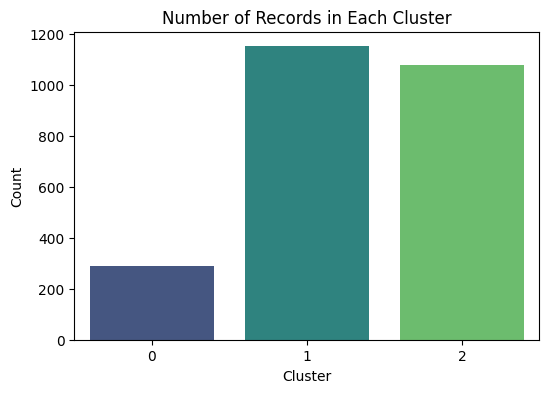

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Records in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


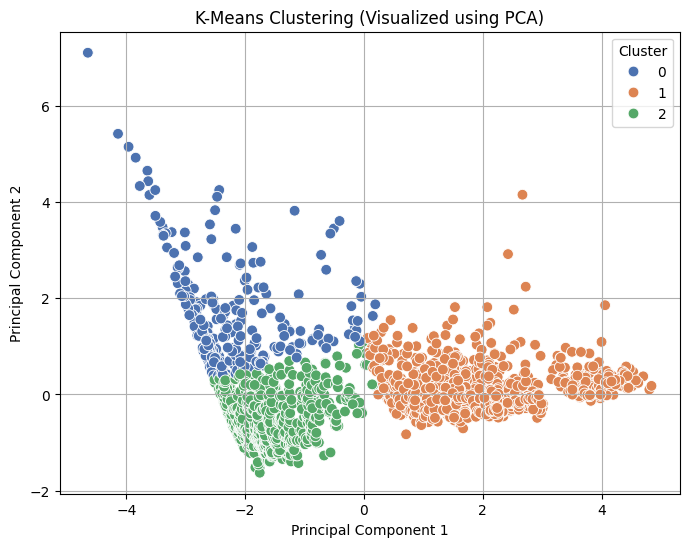

In [12]:
# Reduce 5D features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters in 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='deep', s=60)
plt.title('K-Means Clustering (Visualized using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [13]:
# Mean values per cluster
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("Cluster Feature Means:\n")
display(cluster_summary)

# Example insights
for i in range(len(cluster_summary)):
    print(f"Cluster {i}:")
    print(cluster_summary.loc[i])
    print("-"*30)


Cluster Feature Means:



,Open,High,Low,Close,Volume
Cluster,,,,,
0,42.65,43.38,41.81,42.56,2.504415e+08
1,167.17,169.03,165.47,167.34,7.595184e+07
2,42.41,42.79,42.10,42.49,1.149294e+08


Cluster 0:
Open      4.265000e+01
High      4.338000e+01
Low       4.181000e+01
Close     4.256000e+01
Volume    2.504415e+08
Name: 0, dtype: float64
------------------------------
Cluster 1:
Open           167.17
High           169.03
Low            165.47
Close          167.34
Volume    75951839.84
Name: 1, dtype: float64
------------------------------
Cluster 2:
Open      4.241000e+01
High      4.279000e+01
Low       4.210000e+01
Close     4.249000e+01
Volume    1.149294e+08
Name: 2, dtype: float64
------------------------------


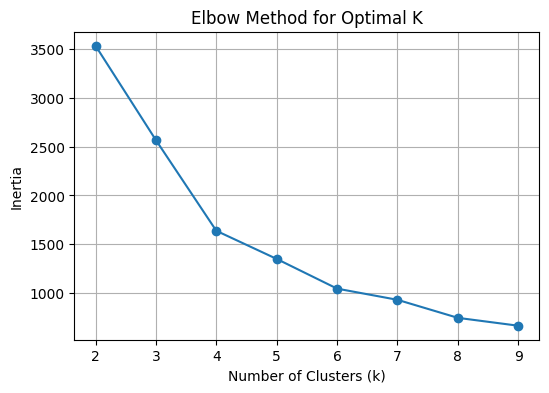

In [14]:
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Insight:

“Elbow point” (where curve bends) shows good number of clusters — often k=3 or k=4.

In [15]:
reflection = """
Week 8 - Unsupervised Learning (Apple Stock Clustering)

Techniques used:
- K-Means clustering to discover hidden patterns.
- PCA to visualize multi-dimensional data in 2D.

Observations:
- Clusters represent different trading day types (e.g., high-volume, low-volume, or mid-price days).
- PCA visualization shows clear separations, meaning stock data has natural structure.
- K=3 gave stable clusters based on the Elbow Method.

Takeaway:
- Clustering helps understand market behavior even without a target variable.
- PCA makes interpretation and feature relationships easier to see visually.

Next step:
- Combine cluster insights with supervised learning results to improve predictive models.
"""

print(reflection)

os.makedirs("reports", exist_ok=True)
with open("reports/week8_clustering_reflection.txt", "w") as f:
    f.write(reflection)
print("Reflection saved → reports/week8_clustering_reflection.txt")



Week 8 - Unsupervised Learning (Apple Stock Clustering)

Techniques used:
- K-Means clustering to discover hidden patterns.
- PCA to visualize multi-dimensional data in 2D.

Observations:
- Clusters represent different trading day types (e.g., high-volume, low-volume, or mid-price days).
- PCA visualization shows clear separations, meaning stock data has natural structure.
- K=3 gave stable clusters based on the Elbow Method.

Takeaway:
- Clustering helps understand market behavior even without a target variable.
- PCA makes interpretation and feature relationships easier to see visually.

Next step:
- Combine cluster insights with supervised learning results to improve predictive models.

Reflection saved → reports/week8_clustering_reflection.txt


In [16]:
# Save figures
plt.figure(figsize=(6,4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='deep', s=60)
plt.title('Final Clusters (PCA Visualization)')
plt.savefig('reports/week8_clusters_pca.png', bbox_inches='tight')
plt.close()
print("Saved cluster visualization: reports/week8_clusters_pca.png")

# Upload notebook manually:
# File → Save a copy in GitHub → Commit message: “Week 8 Unsupervised Learning Completed”


Saved cluster visualization: reports/week8_clusters_pca.png
